In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
df = pd.read_csv(r'C:\Users\ashwi\Downloads\Datasets\pokemon.csv')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

In [26]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [29]:
df['total'] = df['sp_attack'] + df['sp_defense']+df['speed']+df['defense']+df['attack']+df['hp']

In [63]:
#method for dropping non int64 columns
non_ints = []
for i in df:
    if df[i].dtypes != 'int64':
        non_ints.append(i)
df = df.drop(columns=non_ints)  



In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 13 columns):
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness       801 non-null int64
base_total           801 non-null int64
defense              801 non-null int64
experience_growth    801 non-null int64
hp                   801 non-null int64
pokedex_number       801 non-null int64
sp_attack            801 non-null int64
sp_defense           801 non-null int64
speed                801 non-null int64
generation           801 non-null int64
is_legendary         801 non-null int64
dtypes: int64(13)
memory usage: 81.5 KB


In [32]:
df = df.drop('total', axis=1)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
scaler.fit(df.drop('is_legendary',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [36]:
scaled_features = scaler.transform(df.drop('is_legendary',axis=1))

In [37]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,hp,pokedex_number,sp_attack,sp_defense,speed,generation
0,-0.897909,-0.315986,0.236791,-0.926533,-0.780773,0.030371,-0.902083,-1.729890,-0.195025,-0.211687,-0.738486,-1.394551
1,-0.493413,-0.315986,0.236791,-0.196233,-0.325488,0.030371,-0.337312,-1.725565,0.268888,0.325465,-0.219268,-1.394551
2,0.688960,-0.315986,0.236791,1.650503,1.625735,0.030371,0.415717,-1.721240,1.567846,1.757871,0.473022,-1.394551
3,-0.804564,-0.315986,0.236791,-1.002081,-0.975896,0.030371,-1.127992,-1.716916,-0.349663,-0.748839,-0.046196,-1.394551
4,-0.431183,-0.315986,0.236791,-0.196233,-0.488090,0.030371,-0.412614,-1.712591,0.268888,-0.211687,0.473022,-1.394551


In [38]:
from sklearn.model_selection import train_test_split

In [134]:
X = df_feat
y = df['is_legendary']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=42)

In [135]:
from sklearn.neighbors import KNeighborsClassifier

In [136]:
knn = KNeighborsClassifier(n_neighbors=1)

In [138]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 158 to 102
Data columns (total 12 columns):
attack               600 non-null float64
base_egg_steps       600 non-null float64
base_happiness       600 non-null float64
base_total           600 non-null float64
defense              600 non-null float64
experience_growth    600 non-null float64
hp                   600 non-null float64
pokedex_number       600 non-null float64
sp_attack            600 non-null float64
sp_defense           600 non-null float64
speed                600 non-null float64
generation           600 non-null float64
dtypes: float64(12)
memory usage: 60.9 KB


In [140]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 697 to 290
Data columns (total 12 columns):
attack               201 non-null float64
base_egg_steps       201 non-null float64
base_happiness       201 non-null float64
base_total           201 non-null float64
defense              201 non-null float64
experience_growth    201 non-null float64
hp                   201 non-null float64
pokedex_number       201 non-null float64
sp_attack            201 non-null float64
sp_defense           201 non-null float64
speed                201 non-null float64
generation           201 non-null float64
dtypes: float64(12)
memory usage: 20.4 KB


In [137]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [43]:
pred = knn.predict(X_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[177   1]
 [  5  18]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       178
           1       0.95      0.78      0.86        23

    accuracy                           0.97       201
   macro avg       0.96      0.89      0.92       201
weighted avg       0.97      0.97      0.97       201



In [46]:
#find best k neighbor
error_rate=[]

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

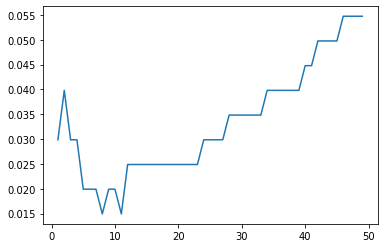

In [47]:
plt.plot(range(1,50),error_rate)

In [48]:
knn8 = KNeighborsClassifier(n_neighbors=8)

In [49]:
knn8.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [50]:
pred8 = knn8.predict(X_test)

In [51]:
print(confusion_matrix(y_test,pred8))
print(classification_report(y_test,pred8))

[[178   0]
 [  3  20]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       178
           1       1.00      0.87      0.93        23

    accuracy                           0.99       201
   macro avg       0.99      0.93      0.96       201
weighted avg       0.99      0.99      0.98       201



In [54]:
#more optimized prediction using k = 8 nearest neighbors.

In [55]:
#general binomial regression/find most signficant predictors

In [65]:
df['total'] = df['sp_attack'] + df['sp_defense']+df['speed']+df['defense']+df['attack']+df['hp']
df = df.drop(['attack','defense','sp_attack','sp_defense','speed','hp'], axis=1)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
base_egg_steps       801 non-null int64
base_happiness       801 non-null int64
base_total           801 non-null int64
experience_growth    801 non-null int64
pokedex_number       801 non-null int64
generation           801 non-null int64
is_legendary         801 non-null int64
total                801 non-null int64
dtypes: int64(8)
memory usage: 50.2 KB


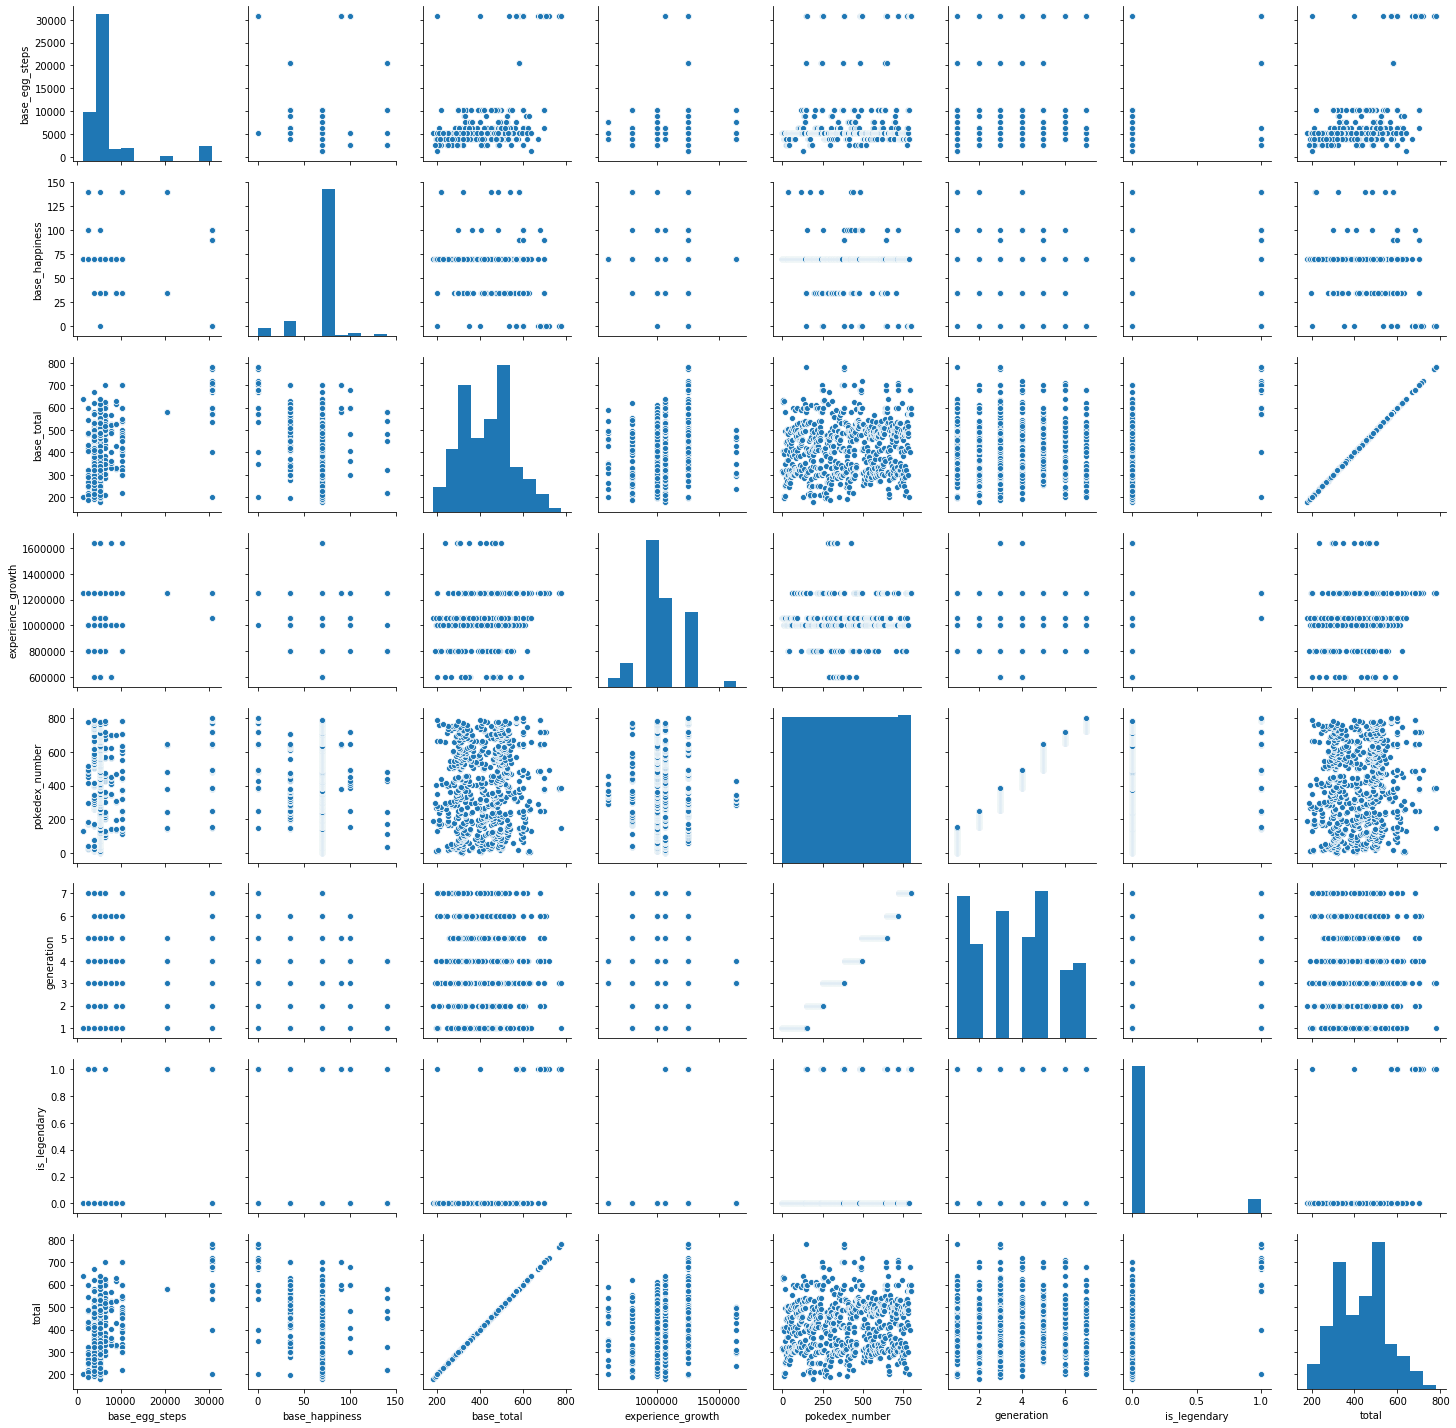

In [67]:
sns.pairplot(df)

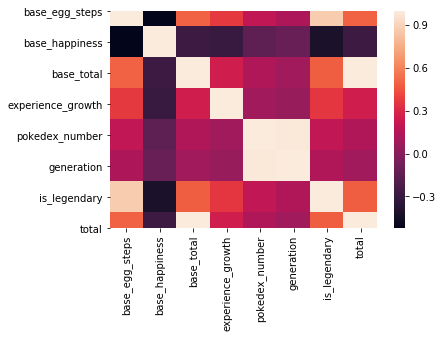

In [68]:
sns.heatmap(df.corr())

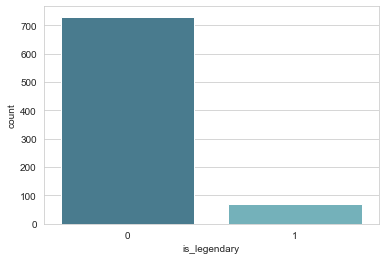

In [82]:
sns.set_style('whitegrid')
sns.countplot(x='is_legendary', data=df,palette='GnBu_d')